In [2]:
# --- Função 1: multiplicação repetida com for ---
def pow_loop(a: float, n: int) -> float:
    result = 1.0
    for _ in range(n):
        result *= a
    return result
# --- Função 2: operador ** do Python ---
def pow_builtin(a: float, n: int) -> float:
    return a ** n
# --- Função 3: exponenciação rápida (divide-and-conquer) ---
def pow_fast(a: float, n: int) -> float:
    if n == 1:
        return a
    if n % 2 == 0:
        half = pow_fast(a, n // 2)
        return half * half
    else:
        return a * pow_fast(a, n - 1)


In [3]:
# --- Testes rápidos de corretude ---
test_cases = [(2.0, 10), (1.0001, 1000), (5.5, 7)]
for a, n in test_cases:
    r_loop = pow_loop(a, n)
    r_builtin = pow_builtin(a, n)
    r_fast = pow_fast(a, n)
    print(f"a={a}, n={n} -> loop={r_loop}, builtin={r_builtin}, fast={r_fast}")
    assert abs(r_loop - r_builtin) < 1e-9, "Loop e builtin divergem!"
    assert abs(r_builtin - r_fast) < 1e-9, "Builtin e fast divergem!"

print("Todos os testes básicos passaram! ✅")


a=2.0, n=10 -> loop=1024.0, builtin=1024.0, fast=1024.0
a=1.0001, n=1000 -> loop=1.1051653926032188, builtin=1.1051653926032206, fast=1.1051653926032
a=5.5, n=7 -> loop=152243.5234375, builtin=152243.5234375, fast=152243.5234375
Todos os testes básicos passaram! ✅


In [5]:
import time, math

a = 1.000001
ns = [10**2, 10**4, 10**6, 10**8]

def _time_once(fn, a, n):
    start = time.time()
    fn(a, n)
    return time.time() - start

results = []

for n in ns:
    row = {"n": n}

    # --- builtin ---
    row["builtin"] = _time_once(pow_builtin, a, n)

    # --- fast ---
    row["fast"] = _time_once(pow_fast, a, n)

    # --- loop ---
    if n <= 10**6:          # remova se quiser medir 10**8 (pode demorar MUITO)
        row["loop"] = _time_once(pow_loop, a, n)
    else:
        row["loop"] = None  # não medido

    # sanidade: resultados coincidem dentro de 1 × 10⁻⁸ (relativo)
    ref = pow_builtin(a, n)
    assert math.isclose(pow_fast(a, n), ref, rel_tol=1e-8, abs_tol=0.0)
    if row["loop"] is not None:
        assert math.isclose(pow_loop(a, n), ref, rel_tol=1e-8, abs_tol=0.0)

    results.append(row)

# Impressão resumida
for r in results:
    n = r['n']
    loop_txt = f"{r['loop']:.4f}s" if r['loop'] is not None else "—"
    print(f"n={n:>9}:  loop={loop_txt:>8}   builtin={r['builtin']:.4f}s   fast={r['fast']:.4f}s")


n=      100:  loop= 0.0000s   builtin=0.0000s   fast=0.0000s
n=    10000:  loop= 0.0000s   builtin=0.0000s   fast=0.0000s
n=  1000000:  loop= 0.0292s   builtin=0.0000s   fast=0.0000s
n=100000000:  loop=       —   builtin=0.0000s   fast=0.0000s


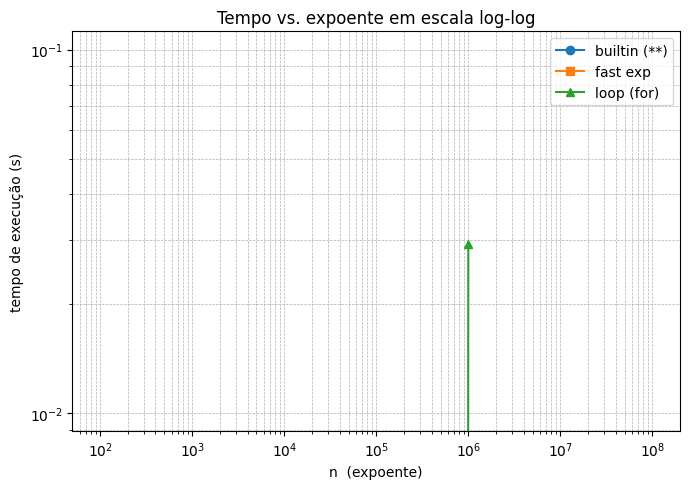

In [6]:
import matplotlib.pyplot as plt

# Extrai vetores de n e tempos já medidos
ns = [row["n"] for row in results]

t_builtin = [row["builtin"] for row in results]
t_fast    = [row["fast"]    for row in results]

# Para o loop, removemos entradas não medidas (None)
ns_loop   = [row["n"] for row in results if row["loop"] is not None]
t_loop    = [row["loop"] for row in results if row["loop"] is not None]

plt.figure(figsize=(7,5))
plt.loglog(ns,       t_builtin, marker='o', label='builtin (**)')
plt.loglog(ns,       t_fast,    marker='s', label='fast exp')
plt.loglog(ns_loop,  t_loop,    marker='^', label='loop (for)')

plt.xlabel('n  (expoente)')
plt.ylabel('tempo de execução (s)')
plt.title('Tempo vs. expoente em escala log-log')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# --- Exponenciação rápida estendida ---
def pow_fast_any(a: float, n: int) -> float:
    """
    Calcula a^n para n inteiro (positivo, negativo ou zero) usando
    método divide-and-conquer.  O( log |n| ).
    """
    if n == 0:
        return 1.0
    if n < 0:
        return 1.0 / pow_fast_any(a, -n)

    # n > 0 a partir daqui
    if n == 1:
        return a
    if n % 2 == 0:
        half = pow_fast_any(a, n // 2)
        return half * half
    else:
        return a * pow_fast_any(a, n - 1)

# --- Loop também adaptado (para comparação) ---
def pow_loop_any(a: float, n: int) -> float:
    if n == 0:
        return 1.0
    if n < 0:
        a, n = 1.0 / a, -n
    result = 1.0
    for _ in range(n):
        result *= a
    return result

# --- Medição para a = 0.9999, n = -10**4 ---
import time, math
a_test, n_test = 0.9999, -10**4

t_builtin = time.time(); r_builtin = a_test ** n_test; t_builtin = time.time() - t_builtin
t_fast    = time.time(); r_fast    = pow_fast_any(a_test, n_test); t_fast    = time.time() - t_fast
t_loop    = time.time(); r_loop    = pow_loop_any(a_test, n_test); t_loop    = time.time() - t_loop

print(f"Resultados numéricos:")
print(f"  builtin = {r_builtin:.10f}")
print(f"  fast    = {r_fast:.10f}")
print(f"  loop    = {r_loop:.10f}\n")

print(f"Tempos:")
print(f"  builtin = {t_builtin:.6f} s")
print(f"  fast    = {t_fast:.6f} s")
print(f"  loop    = {t_loop:.6f} s")

# Checagem de precisão relativa ~1e-10
assert math.isclose(r_fast, r_builtin, rel_tol=1e-10)
assert math.isclose(r_loop, r_builtin, rel_tol=1e-10)


Resultados numéricos:
  builtin = 2.7184177550
  fast    = 2.7184177550
  loop    = 2.7184177550

Tempos:
  builtin = 0.000000 s
  fast    = 0.000000 s
  loop    = 0.000000 s


In [8]:
# -----------------------------------------------------------
# Precisão comparativa – três cenários “difíceis”
# -----------------------------------------------------------

import time, math

def rel_diff(x, y):
    return abs(x - y) / abs(y) if y != 0 else float("nan")

tests = [
    ("a = 1.0001     , n = 1_000_000", 1.0001   , 1_000_000 , True ),
    ("a = 1.000001   , n = 50_000_000", 1.000001 , 50_000_000, False),  # loop omitido (lento)
    ("a = 0.9999     , n = -1_000_000", 0.9999   , -1_000_000, True ),
]

for label, a, n, test_loop in tests:
    print(f"\n{label}")
    r_builtin = a ** n
    r_fast    = pow_fast_any(a, n)

    print(f"builtin = {r_builtin:.15g}")
    print(f"fast    = {r_fast:.15g}   "
          f"(abs diff={abs(r_fast - r_builtin):.3e}, rel diff={rel_diff(r_fast, r_builtin):.3e})")

    if test_loop:
        t0 = time.time()
        r_loop = pow_loop_any(a, n)
        t_loop = time.time() - t0
        print(f"loop    = {r_loop:.15g}   "
              f"(abs diff={abs(r_loop - r_builtin):.3e}, rel diff={rel_diff(r_loop, r_builtin):.3e}, "
              f"tempo={t_loop:.2f}s)")
    else:
        print("loop    = [omitido para evitar espera longa]")



a = 1.0001     , n = 1_000_000
builtin = 2.67471099311269e+43
fast    = 2.67471099305059e+43   (abs diff=6.210e+32, rel diff=2.322e-11)
loop    = 2.67471099311267e+43   (abs diff=1.783e+29, rel diff=6.665e-15, tempo=0.03s)

a = 1.000001   , n = 50_000_000
builtin = 5.18457589132961e+21
fast    = 5.18457588715147e+21   (abs diff=4.178e+12, rel diff=8.059e-10)
loop    = [omitido para evitar espera longa]

a = 0.9999     , n = -1_000_000
builtin = 2.7015922856304e+43
fast    = 2.70159228559794e+43   (abs diff=3.246e+32, rel diff=1.202e-11)
loop    = 2.70159228543624e+43   (abs diff=1.942e+33, rel diff=7.187e-11, tempo=0.03s)
